# ABOUT DATA

# **Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from colorama import Fore 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import plotly.express as px

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
import plotly.figure_factory as ff

%matplotlib inline

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
heart_data = pd.read_csv('death-prediction.csv')
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


* Sex - Gender of patient Male = 1, Female =0
* Age - Age of patient
* Diabetes - 0 = No, 1 = Yes
* Anaemia - 0 = No, 1 = Yes
* High_blood_pressure - 0 = No, 1 = Yes
* Smoking - 0 = No, 1 = Yes
* DEATH_EVENT - 0 = No, 1 = Yes

In [ ]:
# Kiểm tra thông tin dữ liệu
print(heart_data.info())

# Kiểm tra giá trị thiếu
missing_values = heart_data.isnull().sum()
print("Missing values in each column:\n", missing_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None
Missing value

In [ ]:
# Biểu đồ phân phối tử vong (done, dont click)
plt.figure(figsize=(8, 6))
sns.countplot(x='DEATH_EVENT', data=heart_data)
plt.title('Distribution of death')
plt.xlabel('DEATH - NOT_DEATH')
plt.ylabel('Count')
plt.show()


NameError: name 'plt' is not defined

<Figure size 1000x600 with 0 Axes>

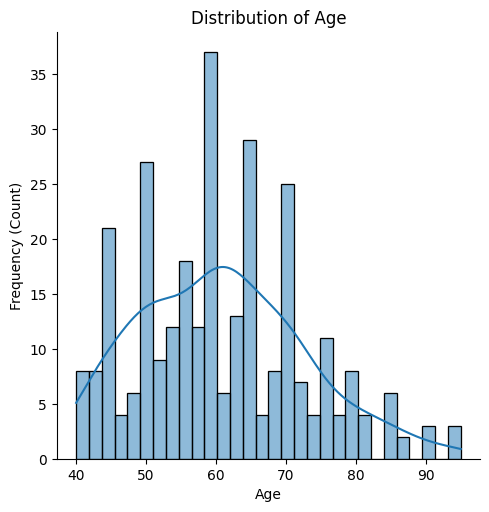

In [ ]:
# Biểu đồ phân phối tuổi
plt.figure(figsize=(10, 6))
sns.displot(heart_data['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency (Count)')
plt.show()

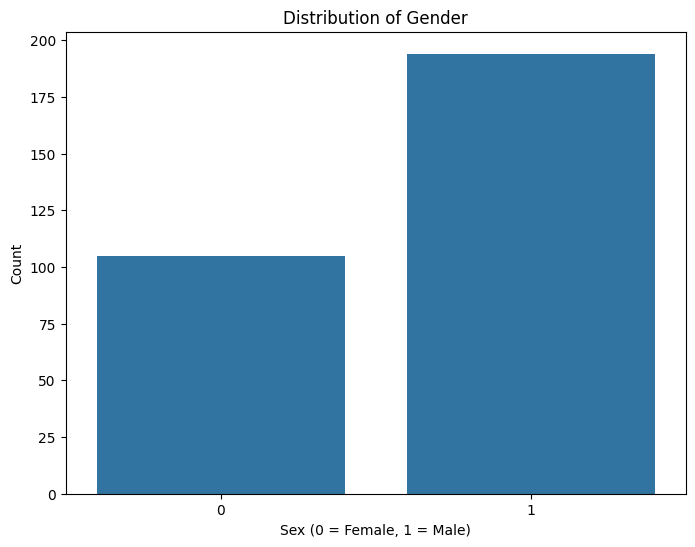

In [ ]:
# Biểu đồ phân phối giới tính
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=heart_data)
plt.title('Distribution of Gender')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.ylabel('Count')
plt.show()

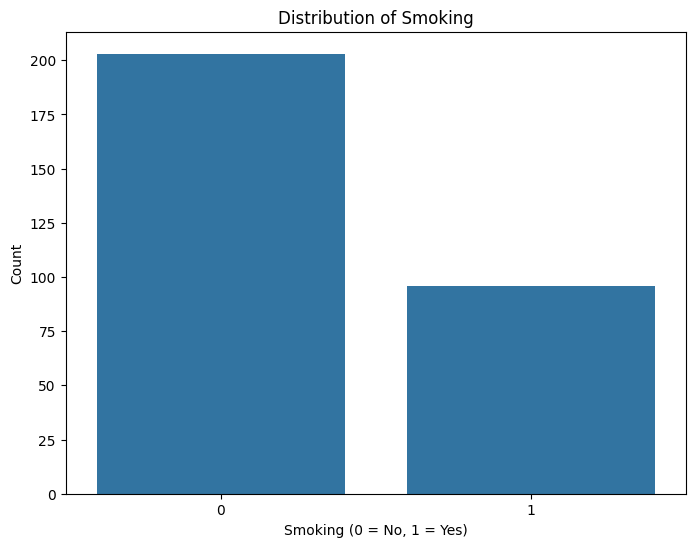

In [ ]:
# Biểu đồ phân phối bệnh nhân hút thuốc
plt.figure(figsize=(8, 6))
sns.countplot(x='smoking', data=heart_data)
plt.title('Distribution of Smoking')
plt.xlabel('Smoking (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

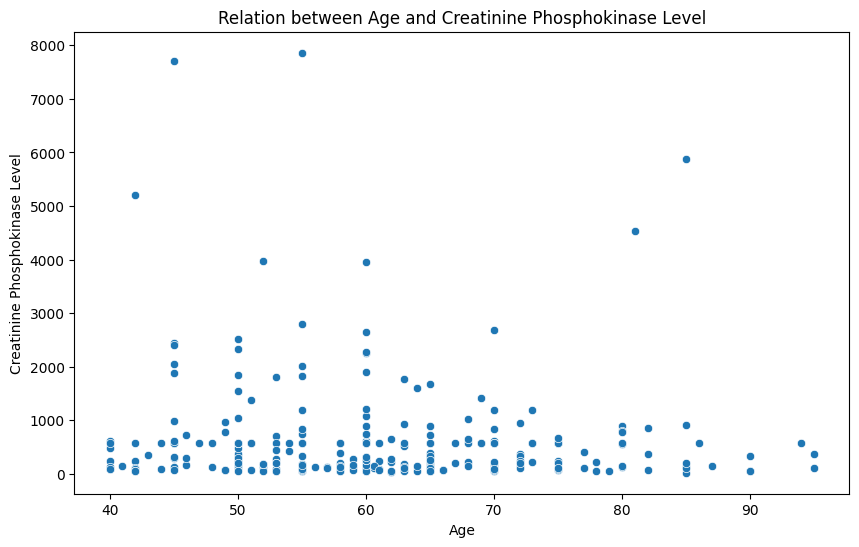

In [ ]:
# Biểu đồ liên quan giữa tuổi và mức độ creatinine phosphokinase
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='creatinine_phosphokinase', data=heart_data)
plt.title('Relation between Age and Creatinine Phosphokinase Level')
plt.xlabel('Age')
plt.ylabel('Creatinine Phosphokinase Level')
plt.show()

In [ ]:
fig = px.box(heart_data, x='sex', y='age', points="all")
fig.update_layout(
    title_text="Gender wise Age Spread - Male = 1 Female = 0")
fig.show()

In [ ]:
male = heart_data[heart_data["sex"]==1]
female = heart_data[heart_data["sex"]==0]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[heart_data["DEATH_EVENT"]==0]),len(male[heart_data["DEATH_EVENT"]==1]),
         len(female[heart_data["DEATH_EVENT"]==0]),len(female[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Gender", width=600, height=600)
fig.show()


# Gender

In [ ]:
surv = heart_data[heart_data["DEATH_EVENT"]==0]["age"]
not_surv = heart_data[heart_data["DEATH_EVENT"]==1]["age"]
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Age on Survival Status")
fig.show()

In [ ]:
fig = px.violin(heart_data, y="age", x="sex", color="DEATH_EVENT", points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Gender on Survival Status")
fig.show()

# Age

In [ ]:
fig = px.violin(heart_data, y="age", x="smoking", color="DEATH_EVENT", points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Smoking on Survival Status")
fig.show()

In [ ]:
fig = px.violin(heart_data, y="age", x="diabetes", color="DEATH_EVENT", points="all", hover_data=heart_data.columns)
fig.update_layout(title_text="Analysis in Age and Diabetes on Survival Status")
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="creatinine_phosphokinase", color="DEATH_EVENT", hover_data=heart_data.columns)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="ejection_fraction", color="DEATH_EVENT", hover_data=heart_data.columns)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="platelets", color="DEATH_EVENT", hover_data=heart_data.columns)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="serum_creatinine", color="DEATH_EVENT", hover_data=heart_data.columns)
fig.show()

In [ ]:
fig = px.histogram(heart_data, x="serum_sodium", color="DEATH_EVENT", hover_data=heart_data.columns)
fig.show()

In [ ]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_sodium']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_sodium']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Sodium on Survival Status")
fig.show()

In [ ]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['serum_creatinine']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['serum_creatinine']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Serum Creatinine on Survival Status")
fig.show()

In [ ]:
surv = heart_data[heart_data['DEATH_EVENT']==0]['ejection_fraction']
not_surv = heart_data[heart_data['DEATH_EVENT']==1]['ejection_fraction']
hist_data = [surv,not_surv]
group_labels = ['Survived', 'Not Survived']
fig = ff.create_distplot(hist_data, group_labels, bin_size=0.5)
fig.update_layout(
    title_text="Analysis in Ejaction Fraction on Survival Status")
fig.show()

***Pie Charts***

In [ ]:
labels = ['No Diabetes','Diabetes']
diabetes_yes = heart_data[heart_data['diabetes']==1]
diabetes_no = heart_data[heart_data['diabetes']==0]
values = [len(diabetes_no), len(diabetes_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=0.5)])
fig.update_layout(
    title_text="Analysis on Diabetes", width=600, height=600)
fig.show()

In [ ]:
fig = px.pie(heart_data, values='diabetes',names='DEATH_EVENT', title='Diabetes Death Event Ratio', width=600, height=600)
fig.show()

In [ ]:
labels = ['Diabetes Yes - Survived','Diabetes Yes - Not Survived', 'Diabetes NO - Survived', 'Diabetes NO - Not Survived']
values = [len(diabetes_yes[heart_data["DEATH_EVENT"]==0]),len(diabetes_yes[heart_data["DEATH_EVENT"]==1]),
         len(diabetes_no[heart_data["DEATH_EVENT"]==0]),len(diabetes_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Diabetes", width=600, height=600)
fig.show()

In [ ]:
anaemia_yes = heart_data[heart_data['anaemia']==1]
anaemia_no = heart_data[heart_data['anaemia']==0]

labels = ['No Anaemia', 'Anaemia']
values = [len(anaemia_no), len(anaemia_yes)]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Anaemia", width=600, height=600)
fig.show()

In [ ]:
fig = px.pie(heart_data, values='anaemia',names='DEATH_EVENT', title='Anaemia Death Event Ration', width=600, height=600)
fig.show()

In [ ]:
anaemia_yes_survi = anaemia_yes[heart_data["DEATH_EVENT"]==0]
anaemia_yes_not_survi = anaemia_yes[heart_data["DEATH_EVENT"]==1]
anaemia_no_survi = anaemia_no[heart_data["DEATH_EVENT"]==0]
anaemia_no_not_survi = anaemia_no[heart_data["DEATH_EVENT"]==1]

labels = ['Anaemia Yes - Survived','Anaemia Yes - Not Survived', 'Anaemia No - Survived', 'Anaemia NO - Not Survived']
values = [len(anaemia_yes[heart_data["DEATH_EVENT"]==0]),len(anaemia_yes[heart_data["DEATH_EVENT"]==1]),
         len(anaemia_no[heart_data["DEATH_EVENT"]==0]),len(anaemia_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Anaemia", width=600, height=600)
fig.show()

In [ ]:
hbp_yes = heart_data[heart_data['high_blood_pressure']==1]
hbp_no = heart_data[heart_data['high_blood_pressure']==0]

labels = ["No High BP","High BP"]
values = [len(hbp_no), len(hbp_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - High Blood Pressure")
fig.show()

In [ ]:
fig = px.pie(heart_data, values='high_blood_pressure',names='DEATH_EVENT', title='High Blood Pressure Death Event Ratio', width=600, height=600)
fig.show()

In [ ]:
hbp_yes_survi = hbp_yes[heart_data["DEATH_EVENT"]==0]
hbp_yes_not_survi = hbp_yes[heart_data["DEATH_EVENT"]==1]
hbp_no_survi = hbp_no[heart_data["DEATH_EVENT"]==0]
hbp_no_not_survi = hbp_no[heart_data["DEATH_EVENT"]==1]

labels = ['HBP Yes - Survived','HBP Yes - Not Survived', 'HBP No - Survived', 'HBP NO - Not Survived']
values = [len(hbp_yes[heart_data["DEATH_EVENT"]==0]),len(hbp_yes[heart_data["DEATH_EVENT"]==1]),
         len(hbp_no[heart_data["DEATH_EVENT"]==0]),len(hbp_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - HBP(high blood pressure)", width=600, height=600)
fig.show()

In [ ]:
smoking_yes = heart_data[heart_data['smoking']==1]
smoking_no = heart_data[heart_data['smoking']==0]

labels = ['No Smoking','Smoking']
values = [len(smoking_no), len(smoking_yes)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on - Smoking", width=600, height=600)
fig.show()

In [ ]:
fig = px.pie(heart_data, values='smoking',names='DEATH_EVENT', title='Smoking Death Event Ratio', width=600, height=600)
fig.show()

In [ ]:
smoking_yes_survi = smoking_yes[heart_data["DEATH_EVENT"]==0]
smoking_yes_not_survi = smoking_yes[heart_data["DEATH_EVENT"]==1]
smoking_no_survi = smoking_no[heart_data["DEATH_EVENT"]==0]
smoking_no_not_survi = smoking_no[heart_data["DEATH_EVENT"]==1]

labels = ['Smoking Yes - Survived','Smoking Yes - Not Survived', 'Smoking No - Survived', 'Smoking NO- Not Survived']
values = [len(smoking_yes[heart_data["DEATH_EVENT"]==0]),len(smoking_yes[heart_data["DEATH_EVENT"]==1]),
         len(smoking_no[heart_data["DEATH_EVENT"]==0]),len(smoking_no[heart_data["DEATH_EVENT"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival - Smoking", width=600, height=600)
fig.show()

**Heatmap**

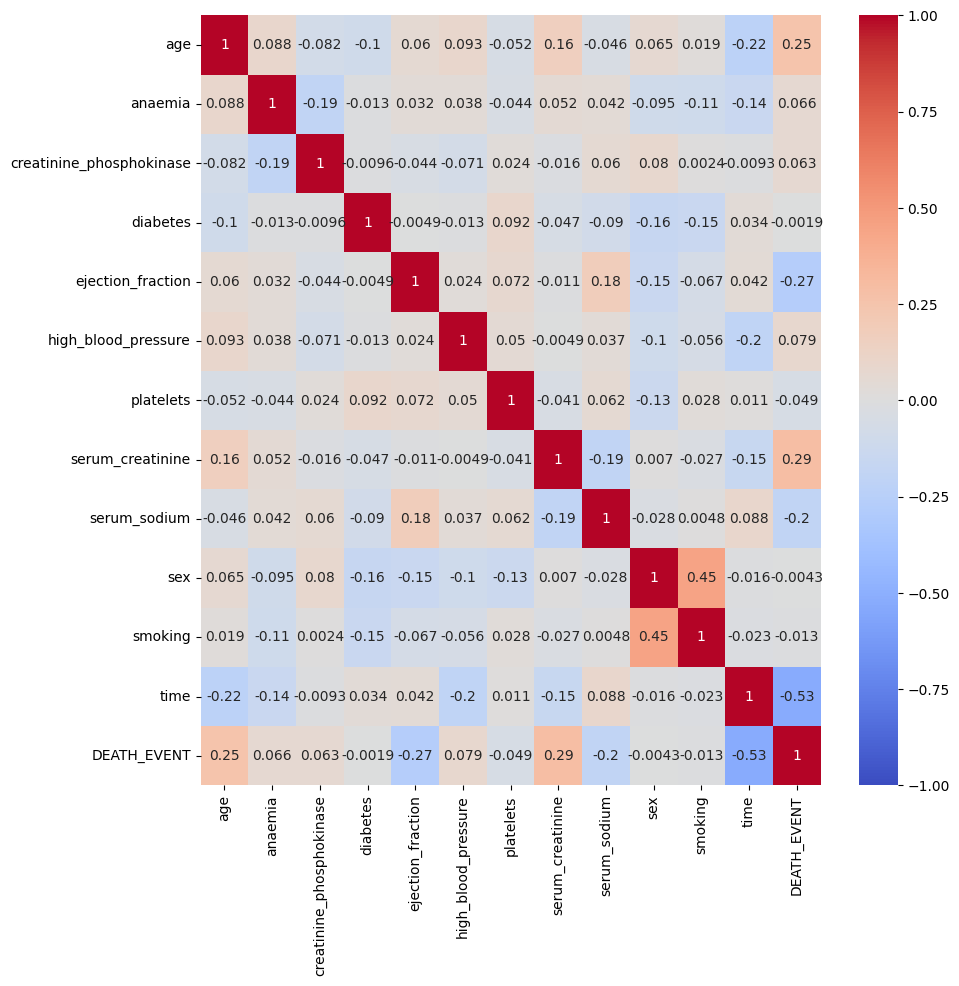

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(heart_data.corr(), vmin=-1, cmap='coolwarm', annot=True);

Text(0.5, 1.0, 'Correlation of Numerical Features with DEATH_EVENT')

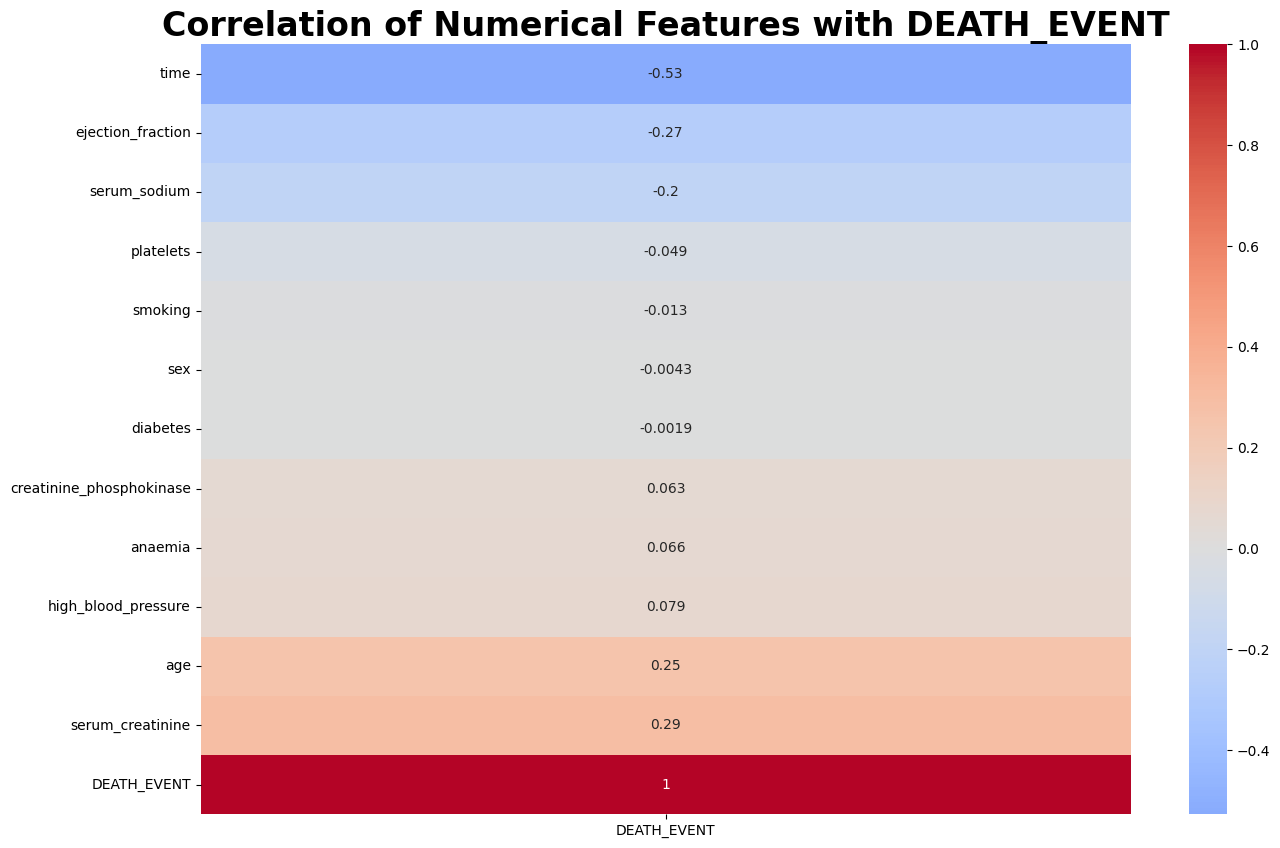

In [ ]:
# Correlation of numerical features with fetal_health
correlation_matrix = heart_data.corr()['DEATH_EVENT']

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix.sort_values().to_frame(), annot=True, cmap='coolwarm', center=0)

plt.title("Correlation of Numerical Features with DEATH_EVENT", fontsize=24, fontweight="bold")

# **Model**

**Train Test Split**

In [ ]:
Features = ['time','ejection_fraction','serum_sodium', 'age']
# Features = ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']
x = heart_data[Features]
y = heart_data["DEATH_EVENT"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=2)

In [ ]:
accuracy_list = []
f1_list = []
recall_list = []
precision_list = []

**Logistic Regression**

In [ ]:
# logistic regression
log_reg = LogisticRegression(verbose=1)
log_reg.fit(x_train, y_train)
log_reg_pred = log_reg.predict(x_test)

log_reg_f1 = f1_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_acc = accuracy_score(y_test, log_reg_pred)

accuracy_list.append(100*log_reg_acc)
f1_list.append(100 * log_reg_f1)
precision_list.append(100 * log_reg_precision)
recall_list.append(100 * log_reg_recall)

In [ ]:
print(Fore.GREEN + "Accuracy of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_acc))
print(Fore.GREEN + "F1 Score of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_f1))
print(Fore.GREEN + "Recall Score of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_recall))
print(Fore.GREEN + "Precision Score of Logistic Regression is : ", "{:.2f}%".format(100* log_reg_precision))

Accuracy of Logistic Regression is :  93.33%
F1 Score of Logistic Regression is :  87.50%
Recall Score of Logistic Regression is :  82.35%
Precision Score of Logistic Regression is :  93.33%


<Figure size 640x480 with 0 Axes>

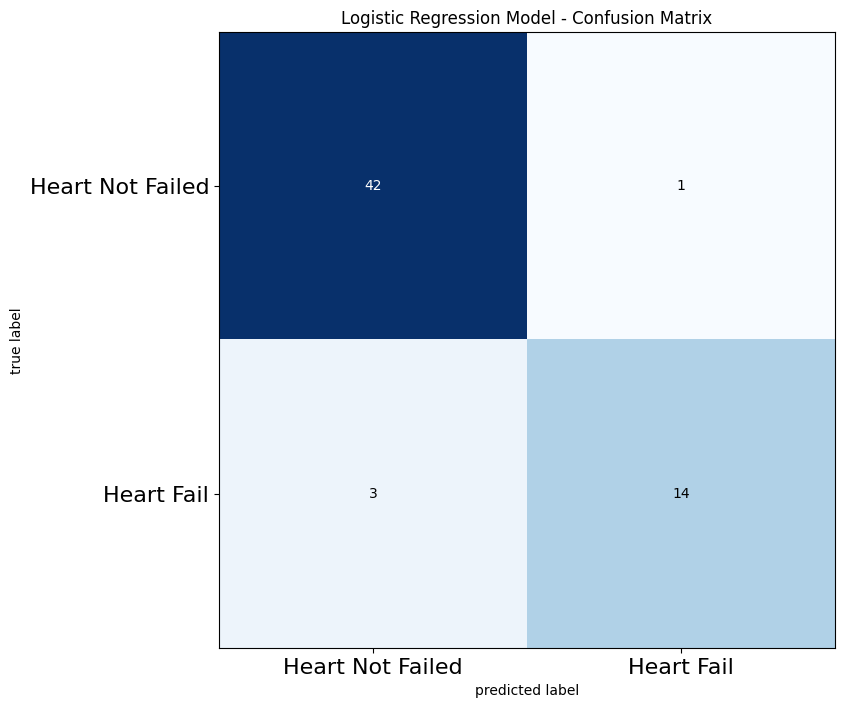

In [ ]:
cm = confusion_matrix(y_test, log_reg_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Logistic Regression Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**K Neighbors Classifier**

In [ ]:
# K Neighbors Classifier
kn_clf = KNeighborsClassifier(n_neighbors=6)
kn_clf.fit(x_train, y_train)
kn_pred = kn_clf.predict(x_test)

kn_acc = accuracy_score(y_test, kn_pred)
kn_f1_score = f1_score(y_test, kn_pred)
kn_recall = recall_score(y_test, kn_pred, average='weighted')
kn_precision = precision_score(y_test, kn_pred, average='weighted')

accuracy_list.append(100*kn_acc)
f1_list.append(100 * kn_f1_score)
precision_list.append(100 * kn_precision)
recall_list.append(100 * kn_recall)

In [ ]:
print(Fore.GREEN + "Accuracy of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_acc))
print(Fore.GREEN + "F1 Score of K Neighbors Classifier is : ", "{:.2f}%".format(100* kn_f1_score))
print(Fore.GREEN + "Recall Score of Neighbors Classifier is : ", "{:.2f}%".format(100* kn_recall))
print(Fore.GREEN + "Precision Score of Neighbors Classifier is : ", "{:.2f}%".format(100* kn_precision))

Accuracy of K Neighbors Classifier is :  90.00%
F1 Score of K Neighbors Classifier is :  80.00%
Recall Score of Neighbors Classifier is :  90.00%
Precision Score of Neighbors Classifier is :  90.20%


<Figure size 640x480 with 0 Axes>

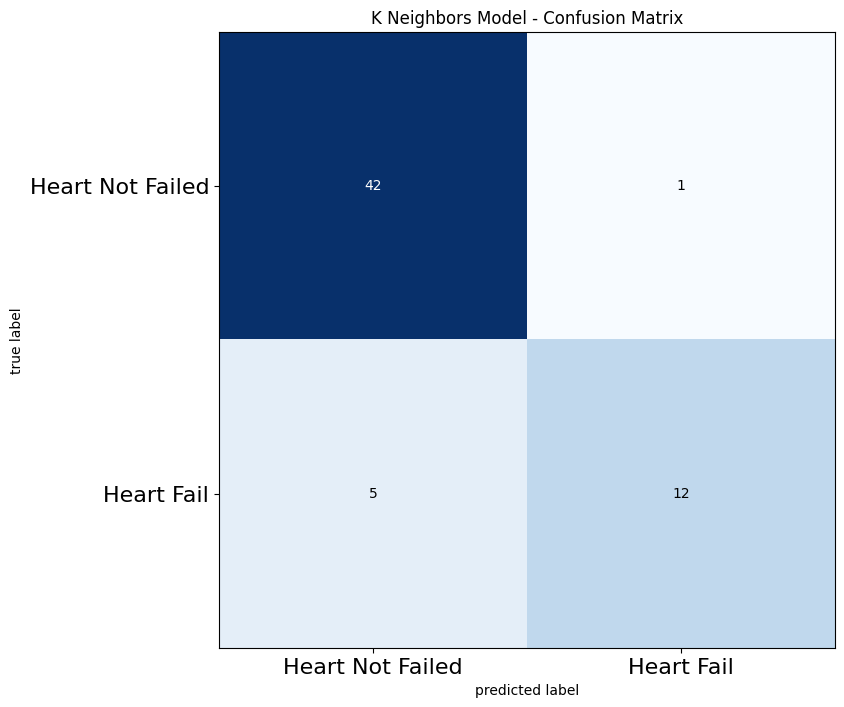

In [ ]:
cm = confusion_matrix(y_test, kn_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("K Neighbors Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Decision Tree Classifier**

In [ ]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(max_leaf_nodes=3, random_state=0, criterion='entropy')
dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)

dt_acc = accuracy_score(y_test, dt_pred)
dt_f1_score = f1_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred, average='weighted')
dt_precision = precision_score(y_test, dt_pred, average='weighted')

accuracy_list.append(100*dt_acc)
precision_list.append(100 * dt_precision)
recall_list.append(100 * dt_recall)
f1_list.append(100 * dt_f1_score)

In [ ]:
print(Fore.GREEN + "Accuracy of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_acc))
print(Fore.GREEN + "F1 Score of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_f1_score))
print(Fore.GREEN + "Recall Score of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_recall))
print(Fore.GREEN + "Precision Score of Decision Tree Classifier is : ", "{:.2f}%".format(100* dt_precision))

Accuracy of Decision Tree Classifier is :  90.00%
F1 Score of Decision Tree Classifier is :  78.57%
Recall Score of Decision Tree Classifier is :  90.00%
Precision Score of Decision Tree Classifier is :  91.22%


<Figure size 640x480 with 0 Axes>

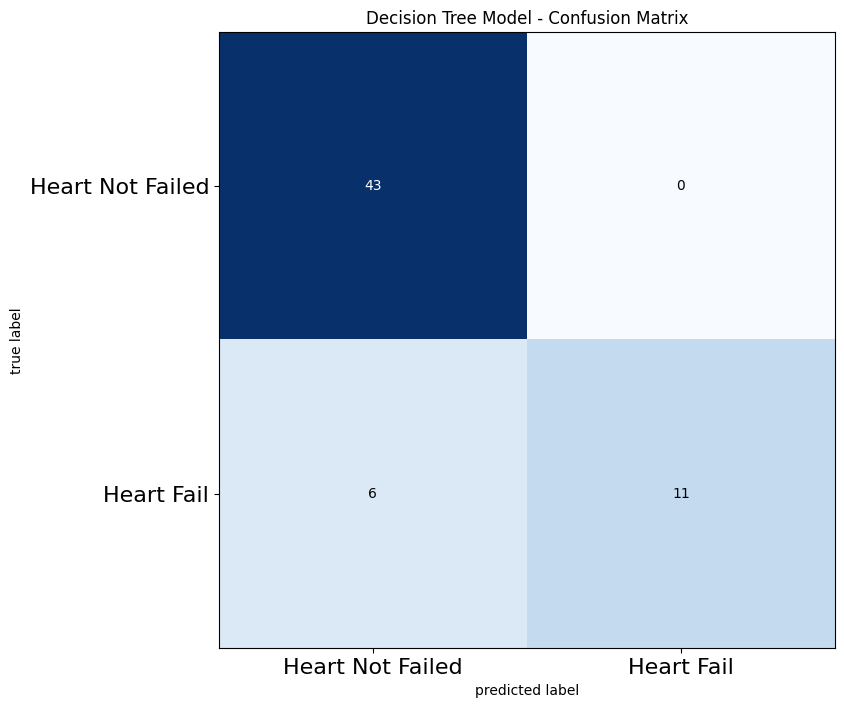

In [ ]:
cm = confusion_matrix(y_test, dt_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Decision Tree Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

**Random Forest Classifier**

In [ ]:
# RandomForestClassifier

r_clf = RandomForestClassifier(max_features=0.5, max_depth=15, random_state=1)
r_clf.fit(x_train, y_train)
r_pred = r_clf.predict(x_test)

r_clf_acc = accuracy_score(y_test, r_pred)
r_clf_f1 = f1_score(y_test, r_pred)
r_clf_recall = recall_score(y_test, r_pred, average='weighted')
r_clf_precision = precision_score(y_test, r_pred, average='weighted')

accuracy_list.append(100*r_clf_acc)
precision_list.append(100 * r_clf_precision)
recall_list.append(100 * r_clf_recall)
f1_list.append(100 * r_clf_f1)

In [ ]:
print(Fore.GREEN + "Accuracy of Random Forest is : ", "{:.2f}%".format(100* r_clf_acc))
print(Fore.GREEN + "F1 Score of Random Forest is : ", "{:.2f}%".format(100* r_clf_f1))
print(Fore.GREEN + "Recall Score of Random Forest is : ", "{:.2f}%".format(100* r_clf_recall))
print(Fore.GREEN + "Precision Score of Random Forest is : ", "{:.2f}%".format(100* r_clf_precision))

Accuracy of Random Forest is :  88.33%
F1 Score of Random Forest is :  80.00%
Recall Score of Random Forest is :  88.33%
Precision Score of Random Forest is :  88.58%


<Figure size 640x480 with 0 Axes>

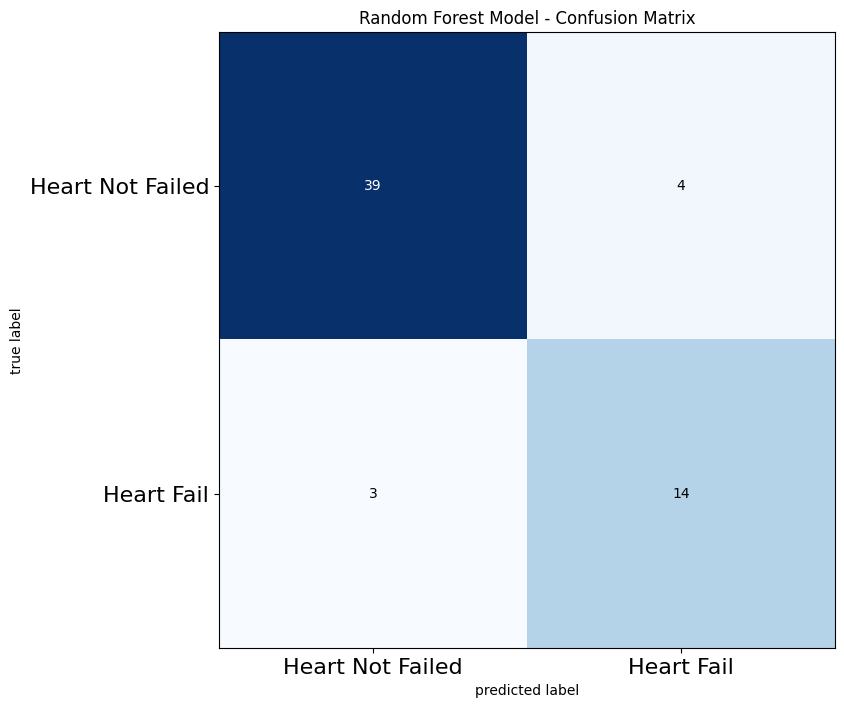

In [ ]:
cm = confusion_matrix(y_test, r_pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Model - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.show()

In [ ]:
model_list = ['Logistic Regression', 'KNearestNeighbours', 'DecisionTree', 'RandomForest']

In [ ]:
print(accuracy_list)
print(f1_list)
print(recall_list)
print(precision_list)


[93.33333333333333, 90.0, 90.0, 88.33333333333333]
[87.5, 80.0, 78.57142857142857, 80.0]
[82.35294117647058, 90.0, 90.0, 88.33333333333333]
[93.33333333333333, 90.19639934533552, 91.22448979591836, 88.58465608465609]


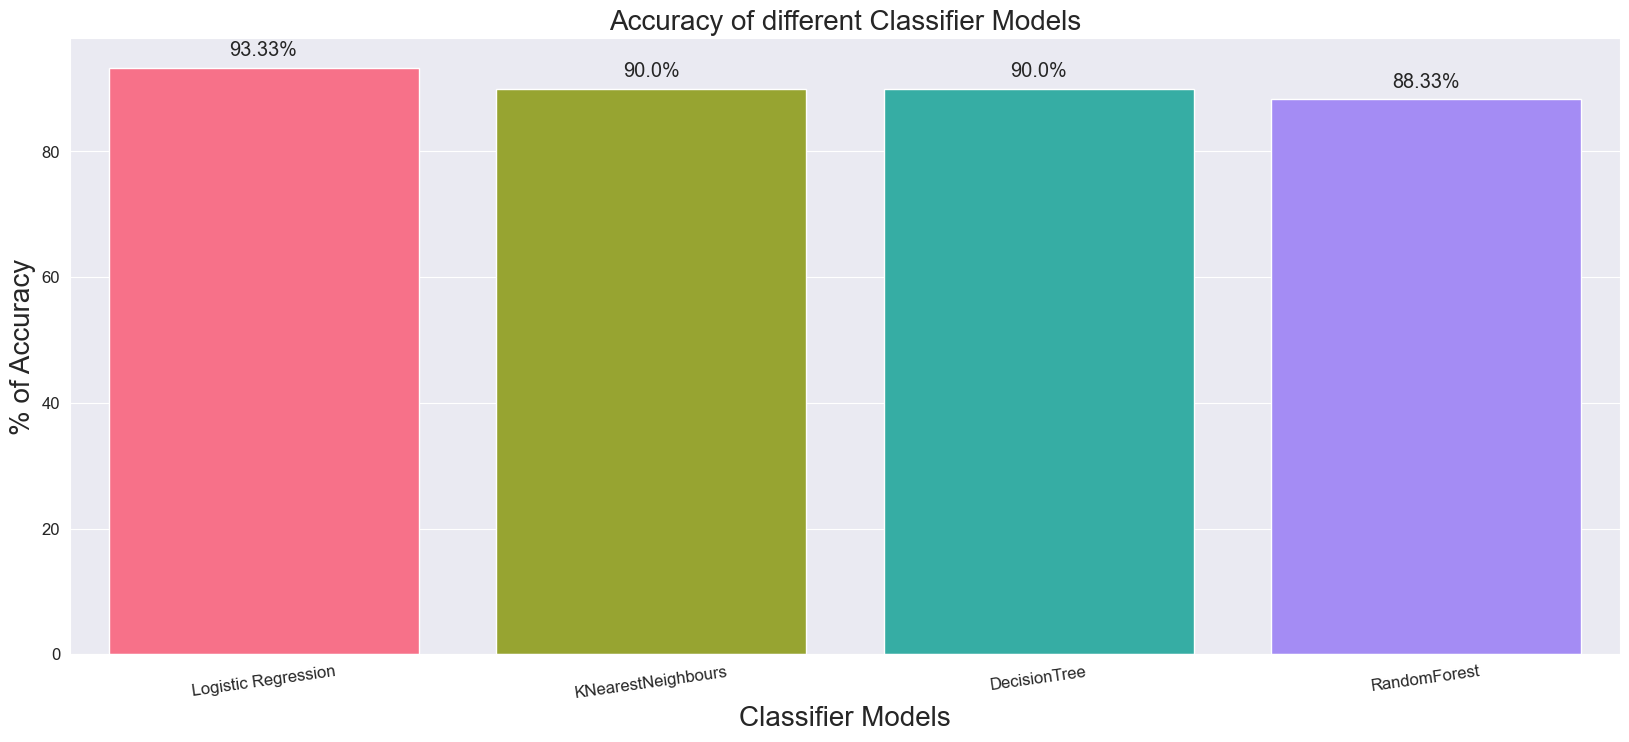

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=accuracy_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Accuracy of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

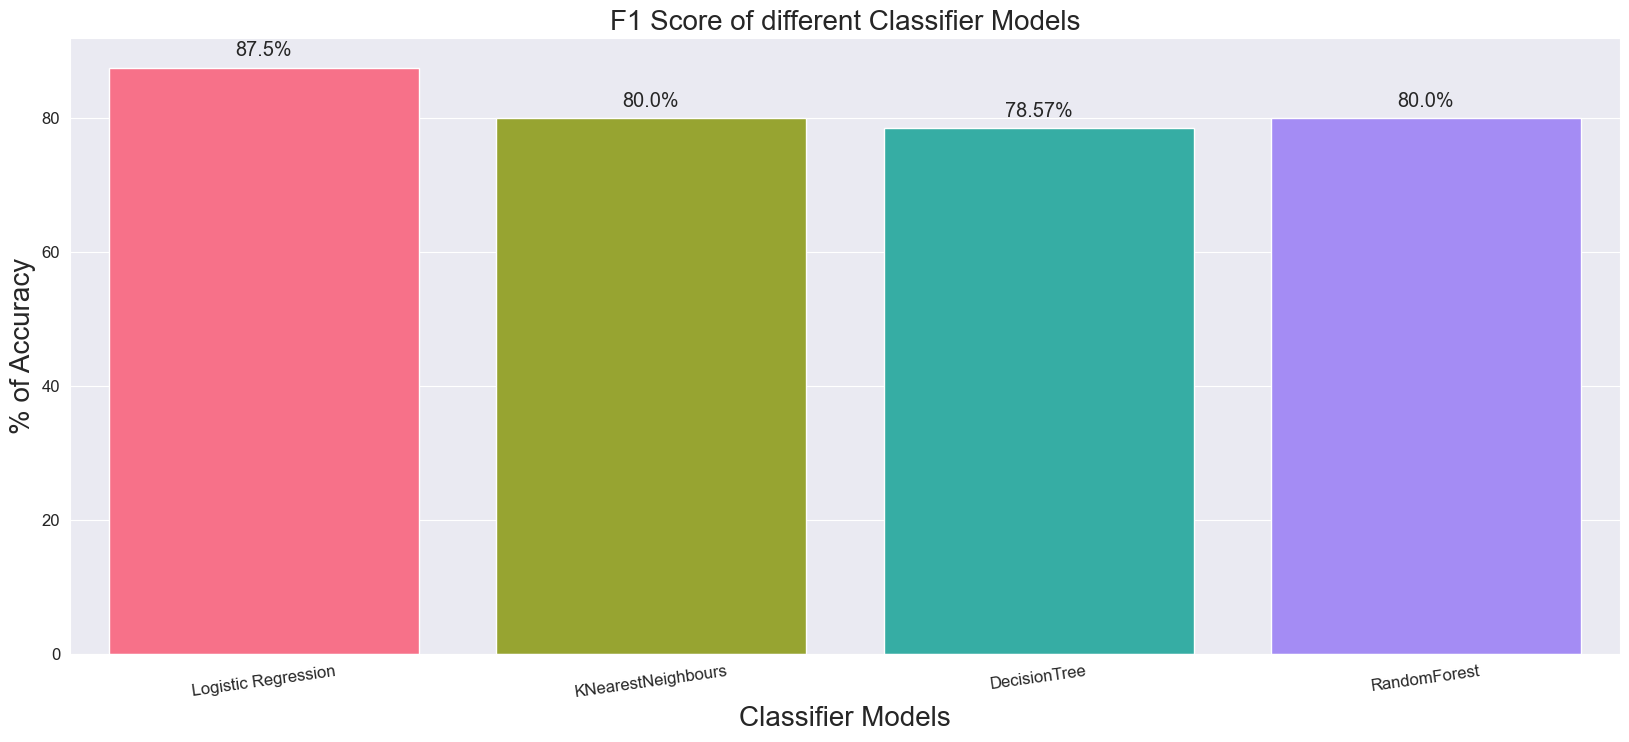

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=f1_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('F1 Score of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

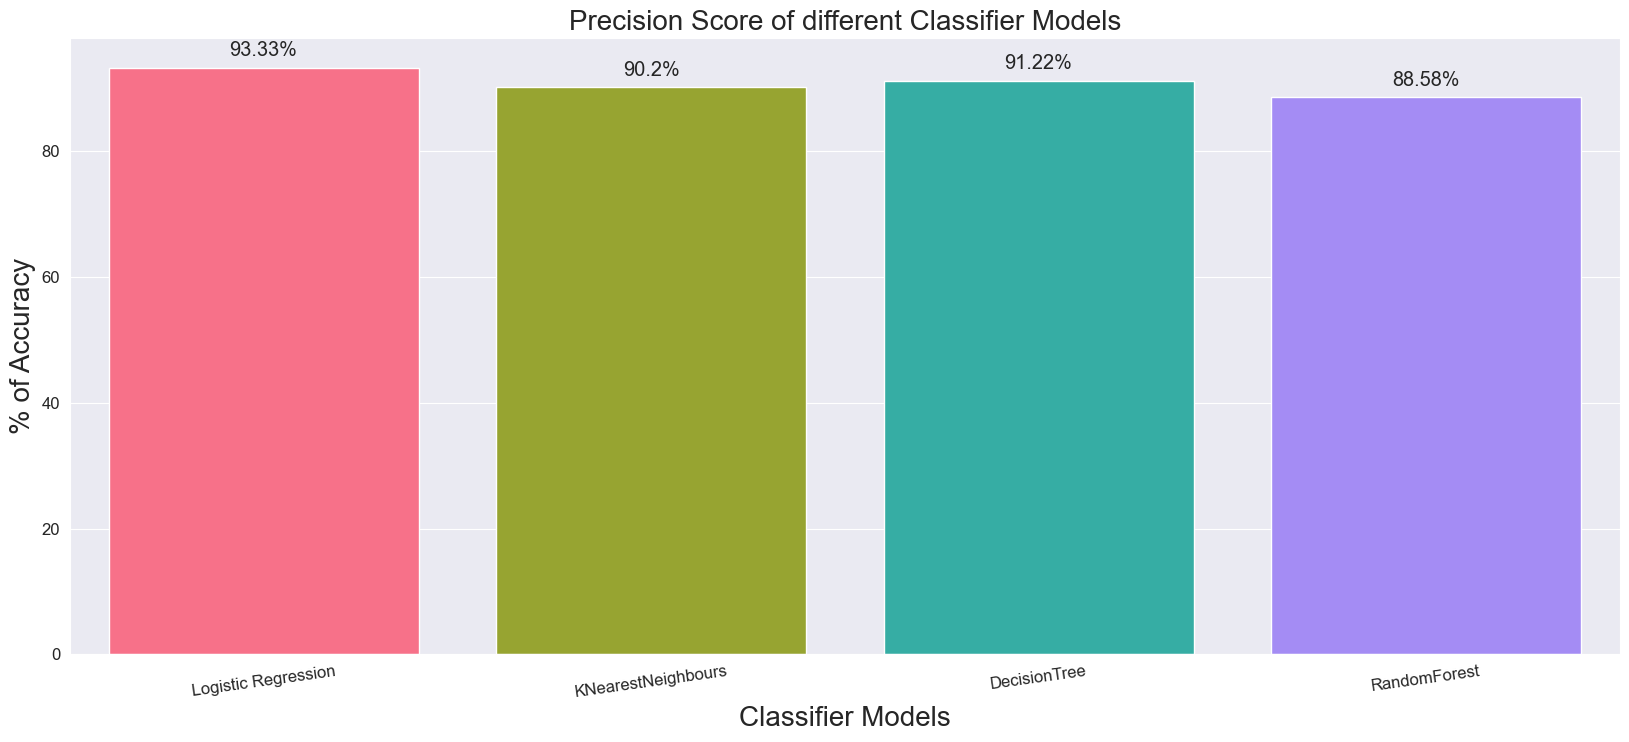

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=precision_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Precision Score of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

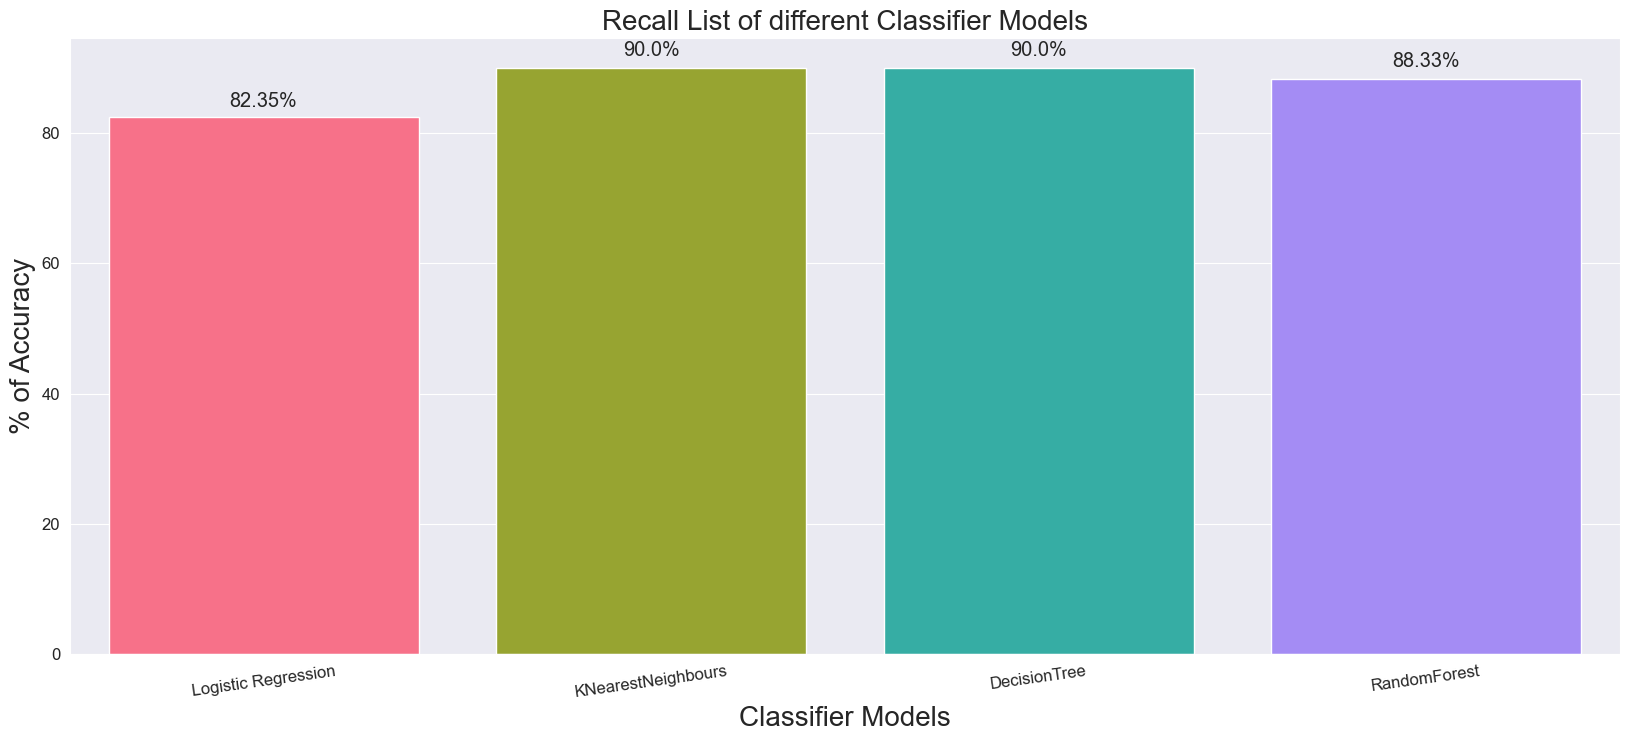

In [ ]:
plt.rcParams['figure.figsize']=20,8
sns.set_style('darkgrid')
ax = sns.barplot(x=model_list, y=recall_list, palette = "husl", saturation =2.0)
plt.xlabel('Classifier Models', fontsize = 20 )
plt.ylabel('% of Accuracy', fontsize = 20)
plt.title('Recall List of different Classifier Models', fontsize = 20)
plt.xticks(fontsize = 12, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 12)
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{round(height,2)}%', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [ ]:
data = {
    'Model': model_list,
    'F1 Score': f1_list,
    'R2 Score': precision_list,
    'Recall': recall_list,
    "Accuracy": accuracy_list
}
df = pd.DataFrame(data)


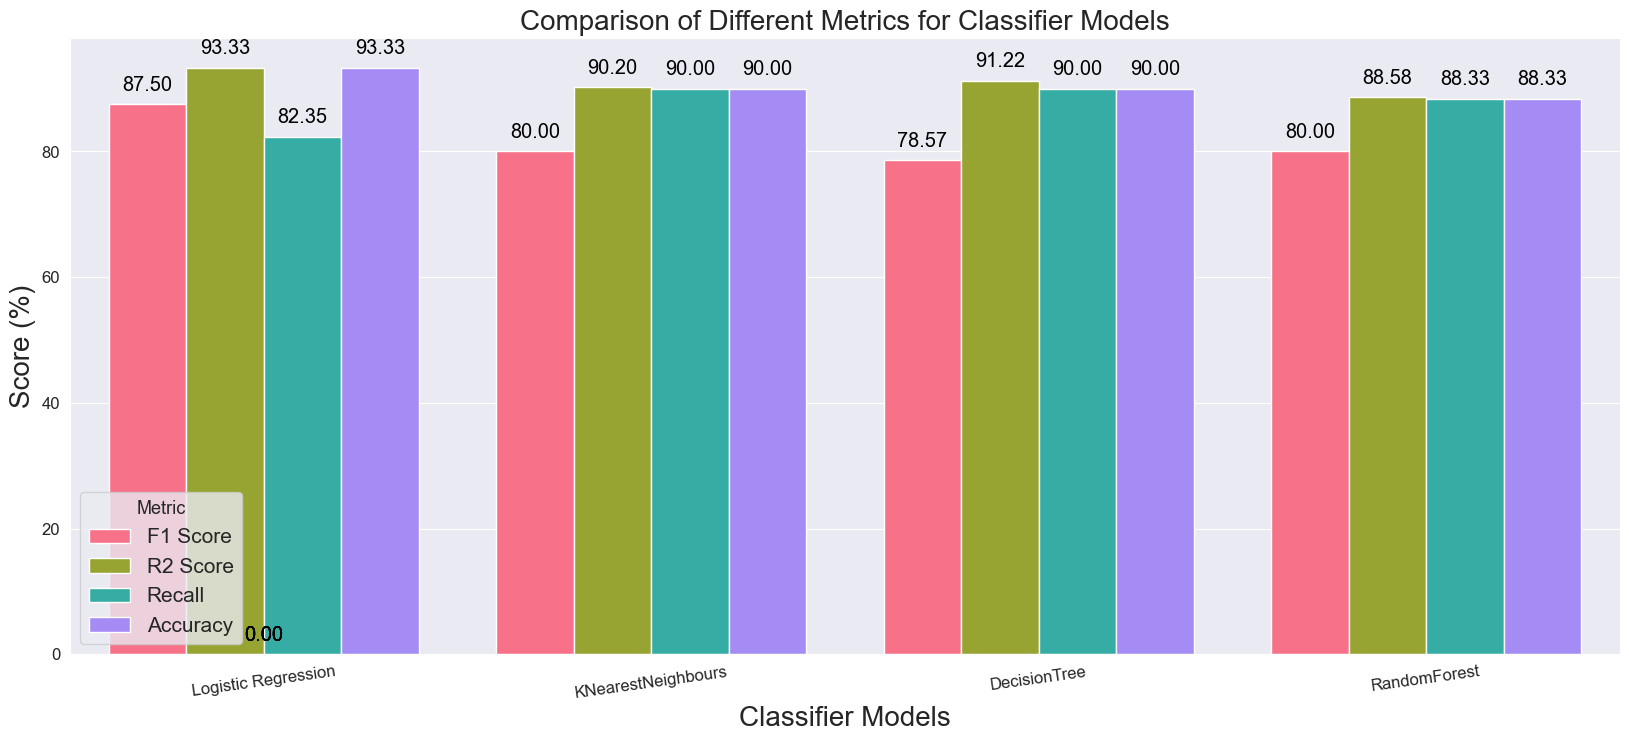

In [ ]:
plt.rcParams['figure.figsize'] = (20, 8)
sns.set_style('darkgrid')

df_melted = df.melt(id_vars='Model', var_name='Metric', value_name='Score')
ax = sns.barplot(x='Model', y='Score', hue='Metric', data=df_melted, palette='husl', saturation=2.0)

plt.xlabel('Classifier Models', fontsize=20)
plt.ylabel('Score (%)', fontsize=20)
plt.title('Comparison of Different Metrics for Classifier Models', fontsize=20)
plt.xticks(fontsize=12, horizontalalignment='center', rotation=8)
plt.yticks(fontsize=12)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='baseline', fontsize='x-large', color='black', xytext=(0, 10), 
                textcoords='offset points')

plt.legend(title='Metric', fontsize=15, title_fontsize='13')
plt.show()